# A soccer pitch for an international match.

As someone who enjoys playing soccer and has a keen interest in data analysis, this project explores the goal-scoring dynamics between men's and women's international soccer matches.

The hypothesis I've set out to investigate is whether women's matches exhibit a higher goal-scoring rate compared to men's.

To ensure the integrity of my analysis, I've chosen to focus exclusively on official FIFA World Cup matches since January 1, 2002. By narrowing the scope in this way, I aim to control for potential confounding factors and produce robust findings.

For this project, I've datasets containing the results of every official men's and women's international football match dating back to the 19th century. These datasets, curated from reputable online sources, are stored in two CSV files: `women_results.csv` and `men_results.csv`.

At the core of my investigation lies the central question:

**Are more goals scored in women's international soccer matches compared to men's?**

With a significance level of 10%, I've formulated the following null and alternative hypotheses:

- **Null Hypothesis (H0)**: The mean number of goals scored in women's international soccer matches is equal to that of men's.
- **Alternative Hypothesis (HA)**: The mean number of goals scored in women's international soccer matches is greater than that of men's.



In [ ]:
# URLs for the datasets
mens_results_url = "https://raw.githubusercontent.com/hasperjiga/Data_Analyst_Portfolio/main/men_results.csv"
womens_results_url = "https://raw.githubusercontent.com/hasperjiga/Data_Analyst_Portfolio/main/women_results.csv"

# import libraries and data
import numpy as np
import pandas as pd
!pip install pingouin
import pingouin
from scipy.stats import mannwhitneyu
mens_results = pd.read_csv('/content/men_results.csv')
womens_results = pd.read_csv('/content/women_results.csv')

## preview the DataFrames
print(mens_results.head())
print(mens_results.info())
print(womens_results.head())
print(womens_results.info())

   Unnamed: 0        date home_team away_team  home_score  away_score  \
0           0  1872-11-30  Scotland   England           0           0   
1           1  1873-03-08   England  Scotland           4           2   
2           2  1874-03-07  Scotland   England           2           1   
3           3  1875-03-06   England  Scotland           2           2   
4           4  1876-03-04  Scotland   England           3           0   

  tournament  
0   Friendly  
1   Friendly  
2   Friendly  
3   Friendly  
4   Friendly  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dty

In [ ]:
## Clean and Prepare the Data

# Add a new column 'total_score' to each DataFrame by summing up 'home_score' and 'away_score'
mens_results['total_score'] = mens_results['home_score'] + mens_results['away_score']
womens_results['total_score'] = womens_results['home_score'] + womens_results['away_score']

# Convert the 'date' column to datetime format for both DataFrames
mens_results['date'] = pd.to_datetime(mens_results['date'])
womens_results['date'] = pd.to_datetime(womens_results['date'])

# Subset the data to include matches after 2002-01-01 and only FIFA World Cup matches
mens_sub = mens_results[(mens_results['date'] > '2002-01-01') & mens_results['tournament'].isin(['FIFA World Cup'])]
womens_sub = womens_results[(womens_results['date'] > '2002-01-01') & womens_results['tournament'].isin(['FIFA World Cup'])]


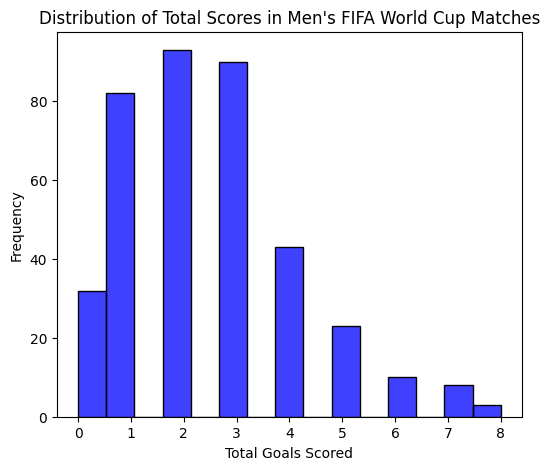

<Figure size 640x480 with 0 Axes>

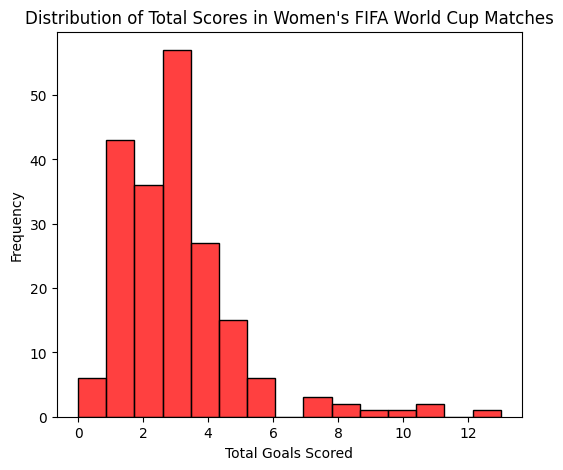

<Figure size 640x480 with 0 Axes>

In [ ]:
## Before calculating the P-Value, let's visualize the distributions

# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting histogram for men's total score
plt.figure(figsize=(6, 5))
sns.histplot(mens_sub['total_score'], bins=15, color='blue')
plt.title("Distribution of Total Scores in Men's FIFA World Cup Matches")
plt.xlabel("Total Goals Scored")
plt.ylabel("Frequency")
plt.show()
plt.clf()  # Clearing the current figure to prepare for the next plot

# Plotting histogram for women's total score
plt.figure(figsize=(6, 5))
sns.histplot(womens_sub['total_score'], bins=15, color='red')
plt.title("Distribution of Total Scores in Women's FIFA World Cup Matches")
plt.xlabel("Total Goals Scored")
plt.ylabel("Frequency")
plt.show()
plt.clf()  # Clearing the current figure


In [ ]:
## Perform Wilcoxon-Mann-Whitney test to compare the mean number of goals scored between men's and women's FIFA World Cup matches

# Adding a gender column to indicate whether the match is from men's or women's FIFA World Cup
mens_sub['gender'] = 'men'
womens_sub['gender'] = 'women'

# Concatenating both datasets into a single dataframe
both_sub = pd.concat([mens_sub, womens_sub], ignore_index=True)

# Selecting relevant columns for analysis
both_sub = both_sub[['total_score', 'gender']]

# Making the dataframe wide to perform the Wilcoxon-Mann-Whitney test
both_sub_wide = both_sub.pivot(columns='gender', values='total_score')

# Performing the Wilcoxon-Mann-Whitney test with the pingouin library
test = pingouin.mwu(x=both_sub_wide['women'], y=both_sub_wide['men'], alternative='greater')

# Printing the test result
print(test)


       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451


<ipython-input-15-a5927afffb9b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mens_sub['gender'] = 'men'
<ipython-input-15-a5927afffb9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  womens_sub['gender'] = 'women'


In [ ]:
## Extract P-Value from Wilcoxon-Mann-Whitney test and determine the test result

# Extracting P-Value and defining the significance level
p_val = test['p-val'][0]
alpha = .1

# Using an IF statement to check whether P-Value is greater than alpha and deciding whether to reject the null hypothesis
if p_val > alpha:
    result = 'fail to reject'
else:
    result = 'reject'

# Creating a dictionary to store the P-Value and test result
result_dict = {'p_val': p_val,
               'result': result}

# Printing the dictionary containing the P-Value and test result
for key, value in result_dict.items():
    print(key, ":", value)

p_val : 0.005106609825443641
result : reject
